## This notebook will be the one which is primarily used for the IBM Datascience Capstone Course

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
cultural_df = pd.read_csv('Seattle_Cultural_Space_Inventory.csv')

In [3]:
cultural_df.describe(include='all')

,Name,Phone,URL,Square Feet Total,Neighborhood,Organization Type,Dominant Discipline,Year of Occupation,Rent vs Own,Age of Current Building,Length of Lease (Date),Year Organization Founded,Number of Past Facilities,Stages and Theaters,Stage & Theater Seats,Gallery Space,Gallery Square Feet,ADA Compliant,Available Parking,Street Presence,Rental Space,Alcohol Sales,Organization Mission,Funded by A&C,Funded by 4Culture,"Stability Index (5=very stable, 1=very uncertain)","Control Index (5=very in control, 1 = very out of control)",Constituency over 50% one race,Specific Demographics and Community,Organization Leadership,Organization Artists,Closed Date,Closed?,Address,Location,Latitude,Longitude
count,1214,729,734,674,501,673,1212,683,689,659,369.000000,683,669.000000,669.000000,474,673,447,657,601,682,679,686,31,456,340,687.000000,34.000000,30,30,8,8,29,1183.000000,1194,1184,1184.000000,1184.000000
unique,1202,697,683,262,70,9,17,93,6,124,NaN,101,NaN,NaN,114,6,90,7,78,6,6,5,31,5,4,NaN,NaN,10,10,2,1,27,NaN,1154,1117,NaN,NaN
top,Arcane Comics & More,(206) 684-7200,www.spl.org,"2,000",Capitol Hill,Y,Visual,"2,012",R,"1,960",NaN,"1,913",NaN,NaN,0,N,0,Y,0,Y,Y,N,Jazz Night School uplifts lives by providing a...,N,Y,NaN,NaN,General,General,Yes,Yes,2014-08-01T00:00:00.000,NaN,305 Harrison St Seattle WA 98109,"(47.62056855, -122.350491)",NaN,NaN
freq,2,4,27,34,45,313,179,44,371,31,NaN,30,NaN,NaN,257,375,202,365,232,500,340,439,1,325,319,NaN,NaN,16,16,7,8,2,NaN,6,6,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1368.479675,NaN,1.092676,0.431988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.087336,3.470588,NaN,NaN,NaN,NaN,NaN,0.029586,NaN,NaN,47.601647,-122.079570
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,945.414336,NaN,1.536119,0.787396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109697,1.397732,NaN,NaN,NaN,NaN,NaN,0.169513,NaN,NaN,0.094775,7.109623
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,47.188389,-122.473648
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,2.250000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,47.573892,-122.342525
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,47.614030,-122.321743
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,47.660497,-122.284902


In [4]:
Neighborhood=cultural_df.dropna(subset=['Neighborhood'])

In [5]:
Neighborhood = Neighborhood.drop_duplicates(subset=['Neighborhood'])

In [6]:
Neighborhood=Neighborhood.dropna(subset=['Latitude'])

In [7]:
Neighborhood.head(5)

,Name,Phone,URL,Square Feet Total,Neighborhood,Organization Type,Dominant Discipline,Year of Occupation,Rent vs Own,Age of Current Building,Length of Lease (Date),Year Organization Founded,Number of Past Facilities,Stages and Theaters,Stage & Theater Seats,Gallery Space,Gallery Square Feet,ADA Compliant,Available Parking,Street Presence,Rental Space,Alcohol Sales,Organization Mission,Funded by A&C,Funded by 4Culture,"Stability Index (5=very stable, 1=very uncertain)","Control Index (5=very in control, 1 = very out of control)",Constituency over 50% one race,Specific Demographics and Community,Organization Leadership,Organization Artists,Closed Date,Closed?,Address,Location,Latitude,Longitude
3,RainierAvenueRadio.World,(425) 591-6977,https://www.rainieravenueradio.world/,"2,000",Columbia City,n,Studios,"2,017",Rent,"1,909",0.0,"2,017",2.0,0.0,50,Yes,500,Yes,NaN,Yes,Yes,No,"Community Radio Station, Multi-Media Network, ...",N,No,5.0,5.0,South Seattle communities,South Seattle communities,Yes,Yes,NaN,NaN,5262 Rainier Avenue South Seattle WA 98118,"(47.55469, -122.28176)",47.554690,-122.281760
17,Barnes & Noble - Downtown,NaN,NaN,NaN,Downtown,NaN,Literary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,600 Pine St Suite 107 Seattle WA 98101,"(47.61287415, -122.3352762)",47.612874,-122.335276
18,Canlis Glass,(206) 282-4428,www.canlisglass.com,"3,500",Uptown,N,Visual,"2,005",R,"1,928",2015.0,"1,996",0.0,0.0,0,Y,"2,000",Y,0,Y,Y,N,NaN,N,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3131 Western Ave #329 Seattle WA 98121,"(47.6182617, -122.3577413)",47.618262,-122.357741
21,Woodland Park United Methodist,(206) 784-6969,www.woodlandparkumc.org,"1,200",Greenwood,Y,Multi-use,"1,950",O,"1,950",NaN,"1,900",1.0,1.0,90,Y,300,Y,30,Y,Y,N,NaN,N,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,302 N 78th St Seattle WA 98103,"(47.685528, -122.355046)",47.685528,-122.355046
27,Seattle Center/Center House Theatre,(206) 684-7200,www.seattlecenter.com,"22,086",Seattle Center in Uptown,Y,Performance,"1,999",Other,"1,934",0.0,"1,999",0.0,3.0,367,Y,480,Y,0,N,Y,N,NaN,Y,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,305 Harrison St Seattle WA 98109,"(47.62056855, -122.350491)",47.620569,-122.350491


Lots of extraneous info included. Keep only the relevant data.

In [8]:
Neighborhood=Neighborhood[['Neighborhood','Latitude','Longitude']]
Neighborhood.reset_index(drop=True, inplace=True)
Neighborhood.head(10)

,Neighborhood,Latitude,Longitude
0,Columbia City,47.554690,-122.281760
1,Downtown,47.612874,-122.335276
2,Uptown,47.618262,-122.357741
3,Greenwood,47.685528,-122.355046
4,Seattle Center in Uptown,47.620569,-122.350491
5,Lake City Way,47.719929,-122.305033
6,Capitol Hill,47.612933,-122.318111
7,University District,47.656666,-122.313554
8,Alki,47.577271,-122.407364
9,Wallingford,47.664098,-122.331045


### Visualize Seattle Neighborhoods

In [9]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="SEA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [10]:
sea_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(Neighborhood['Latitude'], Neighborhood['Longitude'], Neighborhood['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sea_map)  
    
sea_map

Manual observation of the map reveals that some neighborhoods are in the incorrect locations (Capitol Hill, Madrona, ect...).  There are few enough that they can manually be adjusted using domain expertise and/or Google Maps. 

In [11]:
for index in Neighborhood.index:
    if Neighborhood.loc[index, 'Neighborhood']== 'Capitol Hill':
        Neighborhood.loc[index,'Latitude']= 47.623497
        Neighborhood.loc[index,'Longitude']=  -122.320768
    elif Neighborhood.loc[index, 'Neighborhood']== 'Madrona':
        Neighborhood.loc[index,'Latitude']= 47.612786
        Neighborhood.loc[index,'Longitude']=  -122.288927
    elif Neighborhood.loc[index, 'Neighborhood']== 'Wedgwood':
        Neighborhood.loc[index,'Latitude']= 47.690157
        Neighborhood.loc[index,'Longitude']=  -122.290873
    elif Neighborhood.loc[index, 'Neighborhood']== 'Eastlake':
        Neighborhood.loc[index,'Latitude']= 47.639807
        Neighborhood.loc[index,'Longitude']=  -122.326008
    elif Neighborhood.loc[index, 'Neighborhood']== 'Phinney Ridge':
        Neighborhood.loc[index,'Latitude']= 47.675867
        Neighborhood.loc[index,'Longitude']=  -122.354592
    elif Neighborhood.loc[index, 'Neighborhood']== 'Beacon Hill':
        Neighborhood.loc[index,'Latitude']= 47.552707
        Neighborhood.loc[index,'Longitude']=  -122.302146

Manual observation of the map also reveals that there are two Green Lake locations. Delete the duplicate "Greenlake" entry keeping the better positioned entry.

In [12]:
Neighborhood[Neighborhood['Neighborhood']=='Greenlake'].index

Int64Index([32], dtype='int64')

In [13]:
Neighborhood.drop(index=32,inplace=True)

Re-draw the map to check that the above changes had the desired effect.

In [14]:
sea_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(Neighborhood['Latitude'], Neighborhood['Longitude'], Neighborhood['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sea_map)  
    
sea_map

### Import Zillow Data
    Import home price data from Zillow, two data sets will be used.  All home prices and single family home prices.  Zillow data breaks the Queen Anne neighborhood up into smaller chunks, Lower Queen Anne will be used to represent the home prices for the neighborhood as its avg home prices are closer to the median when comparing all four of the sub-neighborhoods that Zillow splits Queen Anne into for both single family and all homes.

In [15]:
single_fam= pd.read_csv('Neighborhood_Zhvi_SingleFamilyResidence.csv')

In [16]:
single_fam=single_fam[single_fam['City']=='Seattle']
single_fam.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName'],axis=1,inplace=True)
single_fam.set_index('RegionName', inplace=True)

In [17]:
single_fam=single_fam.T
single_fam.head(5)

RegionName,Capitol Hill,University District,Magnolia,Greenwood,Wallingford,Fremont,Beacon Hill,Admiral,North Beacon Hill,First Hill,Ravenna,Maple Leaf,Minor,North Queen Anne,Belltown,Phinney Ridge,Adams,Green Lake,Bitter Lake,Haller Lake,Columbia City,Broadview,West Woodland,Olympic Hills,Brighton,East Queen Anne,Loyal Heights,High Point,South Lake Union,Highland Park,Wedgwood,Downtown,North College Park,West Queen Anne,Genesee,Gatewood,Dunlap,South Delridge,Alki,Pinehurst,Lower Queen Anne,Cedar Park,Uptown,Fairmount Park,Mt. Baker,Whittier Heights,Victory Heights,Rainier Beach,Sunset Hill,Bryant,Matthews Beach,Roxhill,South Beacon Hill,Arbor Heights,North Beach,Interbay,Fauntleroy,Roosevelt,Leschi,Seaview,Madison Valley,Northgate,Holly Park,Madrona,Laurelhurst,Mann,Crown Hill,View Ridge,Westlake,Hillman City,North Delridge,Rainier View,Judkins Park,Eastlake,Meadowbrook,Montlake,South Park,Denny Triangle,Riverview,International District,Lakewood,Industrial District,Madison Park,Seward Park,Georgetown,Broadmoor,Hawthorne Hills,Windermere,Portage Bay,Atlantic,Yesler Terrace,Woodland,Jackson Place,Denny - Blaine,Pioneer Square
1996-01-31,299472.0,205831.0,276083.0,162536.0,211705.0,183934.0,142559.0,214791.0,147092.0,126820.0,209653.0,184384.0,146599.0,250787.0,165790.0,201063.0,176714.0,209147.0,168503.0,163221.0,144054.0,221743.0,173497.0,156007.0,130714.0,287379.0,176063.0,136284.0,NaN,135585.0,200615.0,336179.0,164607.0,267520.0,187741.0,180961.0,134834.0,122358.0,249067.0,156772.0,266158.0,198028.0,166229.0,166461.0,213560.0,167625.0,164701.0,142609.0,229902.0,217201.0,213259.0,127928.0,128672.0,162135.0,286882.0,246489.0,226831.0,201224.0,243232.0,195455.0,202044.0,149394.0,161591.0,235769.0,454274.0,136472.0,176631.0,312045.0,215353.0,136634.0,136830.0,128481.0,140565.0,209894.0,182144.0,313746.0,101518.0,NaN,142779.0,152088.0,198493.0,159021.0,493137.0,231713.0,127062.0,723902.0,288351.0,443517.0,343568.0,129125.0,188496.0,NaN,136129.0,536996.0,291021.0
1996-02-29,300275.0,206867.0,275971.0,162776.0,212270.0,184321.0,142139.0,215206.0,147152.0,127793.0,210025.0,184521.0,147773.0,250702.0,167377.0,201557.0,176772.0,209403.0,168675.0,163212.0,143320.0,221814.0,173418.0,156180.0,130518.0,287460.0,176779.0,136207.0,NaN,135676.0,200550.0,335202.0,164459.0,267344.0,187797.0,181785.0,134698.0,122133.0,250845.0,156881.0,265746.0,198268.0,165757.0,166520.0,214120.0,167967.0,164925.0,142236.0,230059.0,217192.0,213135.0,128229.0,128302.0,161883.0,286684.0,246911.0,227801.0,202000.0,243209.0,195634.0,202571.0,149340.0,161223.0,235954.0,454579.0,137582.0,176984.0,313140.0,215452.0,136164.0,136268.0,128557.0,140692.0,210015.0,182269.0,313587.0,101945.0,NaN,142292.0,152182.0,198206.0,158043.0,494661.0,231024.0,126854.0,726043.0,288716.0,442941.0,343296.0,129980.0,189554.0,NaN,137416.0,536057.0,289916.0
1996-03-31,301733.0,207368.0,275642.0,162880.0,212689.0,184625.0,142113.0,215410.0,147100.0,128130.0,209872.0,184581.0,148427.0,250311.0,167425.0,201320.0,176682.0,209582.0,168740.0,163353.0,142844.0,221552.0,173508.0,156700.0,130505.0,287232.0,177167.0,136463.0,NaN,135627.0,200452.0,333779.0,164435.0,267347.0,187757.0,182434.0,134552.0,122219.0,252245.0,157147.0,265795.0,198670.0,164587.0,166520.0,214486.0,168026.0,165322.0,142072.0,229817.0,216786.0,212926.0,128435.0,128162.0,162018.0,286286.0,246981.0,228717.0,202354.0,243488.0,195684.0,202952.0,149533.0,161292.0,236029.0,455394.0,138492.0,177478.0,314108.0,215561.0,136021.0,135865.0,128466.0,141249.0,210283.0,182462.0,312905.0,102329.0,NaN,142131.0,151842.0,197662.0,157880.0,495472.0,230569.0,127158.0,727953.0,289412.0,443041.0,343455.0,130855.0,189761.0,NaN,138615.0,535656.0,289587.0
1996-04-30,302848.0,208639.0,275075.0,163169.0,213372.0,185039.0,141775.0,215244.0,146788.0,128940.0,210160.0,184687.0,149910.0,249310.0,168410.0,201236.0,176724.0,210056.0,169128.0,163539.0,141913.0,221445.0,173519.0,157370.0,130192.0,286727.0,178039.0,136703.0,NaN,135453.0,200344.0,332255.0,164351.0,26

In [18]:
single_fam.rename(columns={'Lower Queen Anne': 'Queen Anne'},inplace=True)

In [19]:
single_fam.reset_index(inplace=True)
single_fam.head(5)

RegionName,index,Capitol Hill,University District,Magnolia,Greenwood,Wallingford,Fremont,Beacon Hill,Admiral,North Beacon Hill,First Hill,Ravenna,Maple Leaf,Minor,North Queen Anne,Belltown,Phinney Ridge,Adams,Green Lake,Bitter Lake,Haller Lake,Columbia City,Broadview,West Woodland,Olympic Hills,Brighton,East Queen Anne,Loyal Heights,High Point,South Lake Union,Highland Park,Wedgwood,Downtown,North College Park,West Queen Anne,Genesee,Gatewood,Dunlap,South Delridge,Alki,Pinehurst,Queen Anne,Cedar Park,Uptown,Fairmount Park,Mt. Baker,Whittier Heights,Victory Heights,Rainier Beach,Sunset Hill,Bryant,Matthews Beach,Roxhill,South Beacon Hill,Arbor Heights,North Beach,Interbay,Fauntleroy,Roosevelt,Leschi,Seaview,Madison Valley,Northgate,Holly Park,Madrona,Laurelhurst,Mann,Crown Hill,View Ridge,Westlake,Hillman City,North Delridge,Rainier View,Judkins Park,Eastlake,Meadowbrook,Montlake,South Park,Denny Triangle,Riverview,International District,Lakewood,Industrial District,Madison Park,Seward Park,Georgetown,Broadmoor,Hawthorne Hills,Windermere,Portage Bay,Atlantic,Yesler Terrace,Woodland,Jackson Place,Denny - Blaine,Pioneer Square
0,1996-01-31,299472.0,205831.0,276083.0,162536.0,211705.0,183934.0,142559.0,214791.0,147092.0,126820.0,209653.0,184384.0,146599.0,250787.0,165790.0,201063.0,176714.0,209147.0,168503.0,163221.0,144054.0,221743.0,173497.0,156007.0,130714.0,287379.0,176063.0,136284.0,NaN,135585.0,200615.0,336179.0,164607.0,267520.0,187741.0,180961.0,134834.0,122358.0,249067.0,156772.0,266158.0,198028.0,166229.0,166461.0,213560.0,167625.0,164701.0,142609.0,229902.0,217201.0,213259.0,127928.0,128672.0,162135.0,286882.0,246489.0,226831.0,201224.0,243232.0,195455.0,202044.0,149394.0,161591.0,235769.0,454274.0,136472.0,176631.0,312045.0,215353.0,136634.0,136830.0,128481.0,140565.0,209894.0,182144.0,313746.0,101518.0,NaN,142779.0,152088.0,198493.0,159021.0,493137.0,231713.0,127062.0,723902.0,288351.0,443517.0,343568.0,129125.0,188496.0,NaN,136129.0,536996.0,291021.0
1,1996-02-29,300275.0,206867.0,275971.0,162776.0,212270.0,184321.0,142139.0,215206.0,147152.0,127793.0,210025.0,184521.0,147773.0,250702.0,167377.0,201557.0,176772.0,209403.0,168675.0,163212.0,143320.0,221814.0,173418.0,156180.0,130518.0,287460.0,176779.0,136207.0,NaN,135676.0,200550.0,335202.0,164459.0,267344.0,187797.0,181785.0,134698.0,122133.0,250845.0,156881.0,265746.0,198268.0,165757.0,166520.0,214120.0,167967.0,164925.0,142236.0,230059.0,217192.0,213135.0,128229.0,128302.0,161883.0,286684.0,246911.0,227801.0,202000.0,243209.0,195634.0,202571.0,149340.0,161223.0,235954.0,454579.0,137582.0,176984.0,313140.0,215452.0,136164.0,136268.0,128557.0,140692.0,210015.0,182269.0,313587.0,101945.0,NaN,142292.0,152182.0,198206.0,158043.0,494661.0,231024.0,126854.0,726043.0,288716.0,442941.0,343296.0,129980.0,189554.0,NaN,137416.0,536057.0,289916.0
2,1996-03-31,301733.0,207368.0,275642.0,162880.0,212689.0,184625.0,142113.0,215410.0,147100.0,128130.0,209872.0,184581.0,148427.0,250311.0,167425.0,201320.0,176682.0,209582.0,168740.0,163353.0,142844.0,221552.0,173508.0,156700.0,130505.0,287232.0,177167.0,136463.0,NaN,135627.0,200452.0,333779.0,164435.0,267347.0,187757.0,182434.0,134552.0,122219.0,252245.0,157147.0,265795.0,198670.0,164587.0,166520.0,214486.0,168026.0,165322.0,142072.0,229817.0,216786.0,212926.0,128435.0,128162.0,162018.0,286286.0,246981.0,228717.0,202354.0,243488.0,195684.0,202952.0,149533.0,161292.0,236029.0,455394.0,138492.0,177478.0,314108.0,215561.0,136021.0,135865.0,128466.0,141249.0,210283.0,182462.0,312905.0,102329.0,NaN,142131.0,151842.0,197662.0,157880.0,495472.0,230569.0,127158.0,727953.0,289412.0,443041.0,343455.0,130855.0,189761.0,NaN,138615.0,535656.0,289587.0
3,1996-04-30,302848.0,208639.0,275075.0,163169.0,213372.0,185039.0,141775.0,215244.0,146788.0,128940.0,210160.0,184687.0,149910.0,249310.0,168410.0,201236.0,176724.0,210056.0,169128.0,163539.0,141913.0,221445.0,173519.0,157370.0,130192.0,286727.0,178039.0,136703.0,NaN,135453.0,200344.0,332255.0,164

In [20]:
single_fam=single_fam[single_fam['index']> '2019']

In [21]:
single_fam.reset_index(drop=True,inplace=True)
single_fam.head(5)

RegionName,index,Capitol Hill,University District,Magnolia,Greenwood,Wallingford,Fremont,Beacon Hill,Admiral,North Beacon Hill,First Hill,Ravenna,Maple Leaf,Minor,North Queen Anne,Belltown,Phinney Ridge,Adams,Green Lake,Bitter Lake,Haller Lake,Columbia City,Broadview,West Woodland,Olympic Hills,Brighton,East Queen Anne,Loyal Heights,High Point,South Lake Union,Highland Park,Wedgwood,Downtown,North College Park,West Queen Anne,Genesee,Gatewood,Dunlap,South Delridge,Alki,Pinehurst,Queen Anne,Cedar Park,Uptown,Fairmount Park,Mt. Baker,Whittier Heights,Victory Heights,Rainier Beach,Sunset Hill,Bryant,Matthews Beach,Roxhill,South Beacon Hill,Arbor Heights,North Beach,Interbay,Fauntleroy,Roosevelt,Leschi,Seaview,Madison Valley,Northgate,Holly Park,Madrona,Laurelhurst,Mann,Crown Hill,View Ridge,Westlake,Hillman City,North Delridge,Rainier View,Judkins Park,Eastlake,Meadowbrook,Montlake,South Park,Denny Triangle,Riverview,International District,Lakewood,Industrial District,Madison Park,Seward Park,Georgetown,Broadmoor,Hawthorne Hills,Windermere,Portage Bay,Atlantic,Yesler Terrace,Woodland,Jackson Place,Denny - Blaine,Pioneer Square
0,2019-01-31,1352354.0,959625.0,1062971.0,752939.0,999470.0,873550.0,612719.0,842887.0,722793.0,640590.0,924923.0,800762.0,822554.0,1089897.0,610874.0,937945.0,849333.0,934865.0,652796.0,634365.0,695691.0,815754.0,835517.0,641276.0,566138.0,1385397.0,834128.0,566415.0,900254.0,541514.0,856895.0,936819.0,691724.0,1282194.0,754692.0,729869.0,528657.0,518662.0,922005.0,675641.0,1157661.0,754236.0,614334.0,692774.0,903556.0,835827.0,714153.0,556216.0,971116.0,943480.0,852683.0,577206.0,520453.0,636247.0,1056626.0,1006489.0,841343.0,858250.0,1030423.0,781497.0,926829.0,639419.0,549696.0,1125291.0,1689392.0,817218.0,738400.0,1253554.0,890139.0,614275.0,607920.0,454499.0,731330.0,945068.0,774911.0,1248126.0,456260.0,1043990.0,584521.0,539075.0,820180.0,589881.0,2051661.0,929065.0,578920.0,2956369.0,1209279.0,1637830.0,1354007.0,712319.0,772124.0,908420.0,759308.0,2128104.0,753754.0
1,2019-02-28,1339400.0,951796.0,1053518.0,745337.0,990708.0,864691.0,605110.0,836703.0,715598.0,633081.0,916971.0,792796.0,814561.0,1081990.0,605075.0,929572.0,841014.0,925856.0,645554.0,628087.0,689442.0,809231.0,827262.0,633875.0,561326.0,1373291.0,828091.0,560859.0,893515.0,536775.0,849980.0,928974.0,681947.0,1272342.0,748809.0,724467.0,525526.0,514096.0,915280.0,670407.0,1149001.0,746505.0,608802.0,686689.0,897664.0,828339.0,706884.0,551831.0,963926.0,936764.0,846263.0,573114.0,518229.0,632026.0,1049760.0,1001844.0,835606.0,848923.0,1022517.0,776669.0,918707.0,634635.0,545054.0,1119205.0,1675612.0,809680.0,731663.0,1244131.0,884573.0,606471.0,601049.0,452938.0,723675.0,934244.0,768957.0,1235373.0,454254.0,1027873.0,579736.0,532863.0,815510.0,586938.0,2033892.0,921750.0,570654.0,2931919.0,1201919.0,1628710.0,1346702.0,704083.0,764502.0,887933.0,751938.0,2113490.0,747748.0
2,2019-03-31,1331448.0,942056.0,1048135.0,738461.0,980538.0,854643.0,601947.0,832955.0,712126.0,627266.0,908211.0,786510.0,809233.0,1075664.0,598585.0,919677.0,832157.0,917281.0,638574.0,622578.0,684743.0,805467.0,817637.0,627468.0,558375.0,1369863.0,824193.0,558264.0,881370.0,533255.0,842242.0,917140.0,673771.0,1266749.0,745437.0,720655.0,524085.0,510194.0,911323.0,663380.0,1145241.0,739896.0,598413.0,683896.0,893895.0,821699.0,699841.0,548701.0,958448.0,927566.0,839040.0,571008.0,516528.0,627516.0,1048649.0,995058.0,830655.0,841937.0,1016704.0,772977.0,914779.0,628088.0,542734.0,1112439.0,1667322.0,805225.0,726628.0,1238910.0,880183.0,600185.0,598448.0,452210.0,718864.0,927249.0,761515.0,1234008.0,453252.0,1010564.0,576582.0,525408.0,812566.0,583729.0,2026797.0,920650.0,567295.0,2907273.0,1197775.0,1619752.0,1350893.0,699174.0,755732.0,876149.0,746728.0,2093714.0,745023.0
3,2019-04-30,1322102.0,932590.0,1043075.0,731212.0,971623.0,846812.0,597920.0,828965.0,709599.0,620909.0,900560.0,781293.0,802916.0,1068179.0,590688.0,911569.0,824511.0,909068.0,632938.0,617651.0

In [22]:
single_fam =single_fam.mean()
single_fam.head()

RegionName
Capitol Hill           1.332279e+06
University District    9.347210e+05
Magnolia               1.054382e+06
Greenwood              7.320075e+05
Wallingford            9.791318e+05
dtype: float64

In [23]:
single_fam= single_fam.to_frame()
single_fam.head()

,0
RegionName,
Capitol Hill,1.332279e+06
University District,9.347210e+05
Magnolia,1.054382e+06
Greenwood,7.320075e+05
Wallingford,9.791318e+05


In [24]:
single_fam.reset_index(inplace=True)

In [25]:
single_fam.rename(columns={'RegionName':'Neighborhood',0:'AVG Price(Single Family)'},inplace=True)

In [26]:
single_fam.head()

,Neighborhood,AVG Price(Single Family)
0,Capitol Hill,1.332279e+06
1,University District,9.347210e+05
2,Magnolia,1.054382e+06
3,Greenwood,7.320075e+05
4,Wallingford,9.791318e+05


In [27]:
single_fam.describe(include='all')

,Neighborhood,AVG Price(Single Family)
count,95,9.500000e+01
unique,95,NaN
top,Windermere,NaN
freq,1,NaN
mean,NaN,8.694453e+05
std,NaN,3.695018e+05
min,NaN,4.575970e+05
25%,NaN,6.239911e+05
50%,NaN,8.103742e+05
75%,NaN,9.263036e+05


In [28]:
Neighborhood=Neighborhood.merge(single_fam,how='inner',on='Neighborhood')
Neighborhood.head()

,Neighborhood,Latitude,Longitude,AVG Price(Single Family)
0,Columbia City,47.554690,-122.281760,6.860093e+05
1,Downtown,47.612874,-122.335276,9.071893e+05
2,Uptown,47.618262,-122.357741,5.804409e+05
3,Greenwood,47.685528,-122.355046,7.320075e+05
4,Capitol Hill,47.623497,-122.320768,1.332279e+06


In [29]:
all_home=pd.read_csv('Neighborhood_Zhvi_AllHomes.csv')
all_home=all_home[all_home['City']=='Seattle']
all_home.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName'],axis=1,inplace=True)
all_home.set_index('RegionName', inplace=True)
all_home=all_home.T
all_home.rename(columns={'Lower Queen Anne': 'Queen Anne'},inplace=True)
all_home.reset_index(inplace=True)
all_home=all_home[all_home['index']> '2019']
all_home.reset_index(drop=True,inplace=True)
all_home =all_home.mean().to_frame()
all_home.reset_index(inplace=True)
all_home.rename(columns={'RegionName':'Neighborhood',0:'AVG Price(All Home Types)'},inplace=True)
all_home.head(5)

,Neighborhood,AVG Price(All Home Types)
0,Capitol Hill,7.082689e+05
1,University District,8.285729e+05
2,Magnolia,1.001797e+06
3,Greenwood,7.083049e+05
4,Wallingford,9.500929e+05


In [30]:
all_home.describe(include='all')

,Neighborhood,AVG Price(All Home Types)
count,96,9.600000e+01
unique,96,NaN
top,Windermere,NaN
freq,1,NaN
mean,NaN,8.099666e+05
std,NaN,3.436312e+05
min,NaN,4.219441e+05
25%,NaN,6.076399e+05
50%,NaN,7.451999e+05
75%,NaN,8.844944e+05


In [31]:
Neighborhood=Neighborhood.merge(all_home,how='inner',on='Neighborhood')
Neighborhood.head()

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types)
0,Columbia City,47.554690,-122.281760,6.860093e+05,679295.333333
1,Downtown,47.612874,-122.335276,9.071893e+05,822911.466667
2,Uptown,47.618262,-122.357741,5.804409e+05,501048.600000
3,Greenwood,47.685528,-122.355046,7.320075e+05,708304.866667
4,Capitol Hill,47.623497,-122.320768,1.332279e+06,708268.933333


In [32]:
Neighborhood['AVG Price(Single Family)']=Neighborhood['AVG Price(Single Family)'].round()
Neighborhood['AVG Price(All Home Types)']=Neighborhood['AVG Price(All Home Types)'].round()

In [33]:
Neighborhood.head()

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types)
0,Columbia City,47.554690,-122.281760,686009.0,679295.0
1,Downtown,47.612874,-122.335276,907189.0,822911.0
2,Uptown,47.618262,-122.357741,580441.0,501049.0
3,Greenwood,47.685528,-122.355046,732007.0,708305.0
4,Capitol Hill,47.623497,-122.320768,1332279.0,708269.0


In [34]:
Neighborhood.describe()

,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types)
count,43.000000,43.000000,4.300000e+01,4.300000e+01
mean,47.622248,-122.327530,8.445645e+05,7.655816e+05
std,0.056612,0.036028,2.740177e+05,2.249987e+05
min,47.521355,-122.407364,4.624270e+05,4.219440e+05
25%,47.580494,-122.352332,6.222405e+05,6.061780e+05
50%,47.622675,-122.326008,8.391140e+05,7.529620e+05
75%,47.669549,-122.299925,9.263035e+05,8.803085e+05
max,47.719806,-122.268508,2.036585e+06,1.637892e+06


In [35]:
x_max = Neighborhood[Neighborhood['AVG Price(All Home Types)']==Neighborhood['AVG Price(All Home Types)'].max()]
x_max

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types)
42,Madison Park,47.63382,-122.276352,2036585.0,1637892.0


In [36]:
x_min=Neighborhood[Neighborhood['AVG Price(All Home Types)']==Neighborhood['AVG Price(All Home Types)'].min()]
x_min

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types)
11,International District,47.595117,-122.327086,523455.0,421944.0


In [37]:
y_min=Neighborhood[Neighborhood['AVG Price(Single Family)']==Neighborhood['AVG Price(Single Family)'].min()]
y_min

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types)
38,South Park,47.526261,-122.322579,462427.0,461936.0


In [38]:
y_max=Neighborhood[Neighborhood['AVG Price(Single Family)']==Neighborhood['AVG Price(Single Family)'].max()]
y_max

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types)
42,Madison Park,47.63382,-122.276352,2036585.0,1637892.0


One last check of the map to see what our final data looks like.

In [39]:
sea_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(Neighborhood['Latitude'], Neighborhood['Longitude'], Neighborhood['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sea_map)  
    
sea_map

### Define Foursquare API Credentials

In [40]:
CLIENT_ID = 'PHYE2SQOACPIIUITWPPGL4M34KYMGWN0SIIBCPXAWW3EWVVF' 
CLIENT_SECRET = 'DG1CWNXRNEGPYXAJOYL5AO0K5MV0WO5OI2SFISWMJ5U42JN3'
VERSION = '20180605' 

### Function to get nearby venues for a neighborhood

In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    LIMIT = 100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Use the function to query the API for Seattle neighborhood venue information and make a new data frame

In [42]:
seattle_venues = getNearbyVenues(names=Neighborhood['Neighborhood'],latitudes=Neighborhood['Latitude'],
                                 longitudes=Neighborhood['Longitude'])

Columbia City
Downtown
Uptown
Greenwood
Capitol Hill
University District
Alki
Wallingford
Green Lake
Pioneer Square
Interbay
International District
Madison Valley
Haller Lake
Belltown
Mt. Baker
Georgetown
Queen Anne
Northgate
Montlake
Maple Leaf
Fremont
Madrona
Leschi
Hillman City
Wedgwood
South Lake Union
First Hill
Beacon Hill
Loyal Heights
Ravenna
Rainier Beach
Magnolia
Highland Park
Eastlake
Phinney Ridge
Pinehurst
Crown Hill
South Park
Admiral
Fauntleroy
Seward Park
Madison Park


In [43]:
seattle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Admiral,50,50,50,50,50,50
Alki,53,53,53,53,53,53
Beacon Hill,9,9,9,9,9,9
Belltown,100,100,100,100,100,100
Capitol Hill,100,100,100,100,100,100
Columbia City,52,52,52,52,52,52
Crown Hill,24,24,24,24,24,24
Downtown,100,100,100,100,100,100
Eastlake,45,45,45,45,45,45


In [44]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 282 uniques categories.


### Use one-hot encoding for venue categories.

In [45]:
sea_onehot = pd.get_dummies(seattle_venues['Venue Category'], prefix="", prefix_sep="")

sea_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 
col_name='Neighborhood'
first_col=sea_onehot.pop(col_name)
sea_onehot.insert(0,col_name,first_col)
sea_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Park,Parking,Pawn Shop,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo E

### Groupby neighborhood and find the mean number of each venue type for that neighborhood.

In [46]:
sea_grouped = sea_onehot.groupby('Neighborhood').mean().reset_index()
sea_grouped.head(10)

,Neighborhood,ATM,Accessories Store,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Park,Parking,Pawn Shop,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo E

### Define function to return the most common venues and sort them in descending order. Then use fuction to create a new dataframe that contains the top ten most common venues for each neighborhood.

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sea_grouped['Neighborhood']

for ind in np.arange(sea_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sea_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiral,Coffee Shop,Beach,Grocery Store,Pub,Juice Bar,Park,Bubble Tea Shop,Salon / Barbershop,Café,Post Office
1,Alki,Ice Cream Shop,Coffee Shop,Park,Trail,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Art Gallery,Restaurant,Pharmacy
2,Beacon Hill,Pizza Place,Bar,Steakhouse,Bike Trail,Coffee Shop,Dim Sum Restaurant,BBQ Joint,Intersection,Park,Zoo Exhibit
3,Belltown,Coffee Shop,Hotel,Bakery,Food Truck,Clothing Store,Sushi Restaurant,Cocktail Bar,Movie Theater,Pizza Place,Women's Store
4,Capitol Hill,Bar,Coffee Shop,Cocktail Bar,American Restaurant,Italian Restaurant,Bakery,Yoga Studio,Indian Restaurant,Smoke Shop,Park


In [49]:
neighborhoods_venues_sorted.shape

(43, 11)

### Use K-Means to cluster the neighborhoods.

Use the elbow method to find the optimal k.

In [50]:
sea_grouped_clustering = sea_grouped.drop('Neighborhood', 1)

In [51]:
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sea_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)

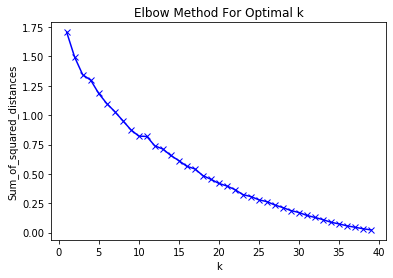

In [52]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Use the the Silhouette Method to verify Opitmal K.

In [53]:
sil = []
kmax = 40

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(sea_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(sea_grouped_clustering, labels, metric = 'euclidean'))

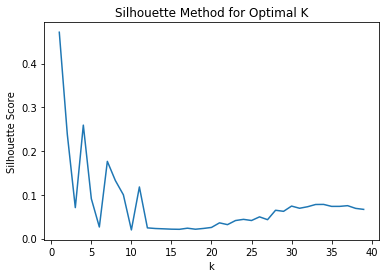

In [54]:
plt.plot(K,sil)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()

In [55]:
kclusters = 34

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sea_grouped_clustering)

(unique, counts) = np.unique(kmeans.labels_, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[ 0  2]
 [ 1  1]
 [ 2  5]
 [ 3  1]
 [ 4  1]
 [ 5  1]
 [ 6  1]
 [ 7  1]
 [ 8  1]
 [ 9  1]
 [10  1]
 [11  1]
 [12  1]
 [13  1]
 [14  1]
 [15  1]
 [16  2]
 [17  4]
 [18  1]
 [19  1]
 [20  1]
 [21  1]
 [22  1]
 [23  1]
 [24  1]
 [25  1]
 [26  1]
 [27  1]
 [28  1]
 [29  1]
 [30  1]
 [31  1]
 [32  1]
 [33  1]]


In [56]:
kmeans.labels_[0:10]

array([32, 24,  4,  0, 17, 33, 28,  0, 26,  3])

### Merge dataframes to add cluster labels and top 10 venues for each neighborhood.

In [57]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sea_merged = Neighborhood.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sea_merged.head()

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Columbia City,47.554690,-122.281760,686009.0,679295.0,33,Pizza Place,Convenience Store,Pub,Ice Cream Shop,Bar,Ethiopian Restaurant,Coffee Shop,Vietnamese Restaurant,Pet Store,African Restaurant
1,Downtown,47.612874,-122.335276,907189.0,822911.0,0,Hotel,Coffee Shop,Clothing Store,Bakery,Theater,American Restaurant,Cocktail Bar,Market,Rock Club,Middle Eastern Restaurant
2,Uptown,47.618262,-122.357741,580441.0,501049.0,16,Coffee Shop,Deli / Bodega,Sculpture Garden,Gym,Thai Restaurant,Mexican Restaurant,Pizza Place,Bus Stop,Hotel,Beach
3,Greenwood,47.685528,-122.355046,732007.0,708305.0,17,Coffee Shop,Pizza Place,Mexican Restaurant,Bar,Toy / Game Store,Furniture / Home Store,Ice Cream Shop,Mediterranean Restaurant,Pet Store,Bus Station
4,Capitol Hill,47.623497,-122.320768,1332279.0,708269.0,17,Bar,Coffee Shop,Cocktail Bar,American Restaurant,Italian Restaurant,Bakery,Yoga Studio,Indian Restaurant,Smoke Shop,Park


### Visualize Clusters

In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sea_merged['Latitude'], sea_merged['Longitude'], sea_merged['Neighborhood'], sea_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



### Find which cluster Capitol Hill was assigned and then find other neighborhoods like it.

In [59]:
sea_merged[sea_merged['Neighborhood']=='Capitol Hill']

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Capitol Hill,47.623497,-122.320768,1332279.0,708269.0,17,Bar,Coffee Shop,Cocktail Bar,American Restaurant,Italian Restaurant,Bakery,Yoga Studio,Indian Restaurant,Smoke Shop,Park


In [60]:
sea_merged[sea_merged['Cluster Labels']== 17]

,Neighborhood,Latitude,Longitude,AVG Price(Single Family),AVG Price(All Home Types),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Greenwood,47.685528,-122.355046,732007.0,708305.0,17,Coffee Shop,Pizza Place,Mexican Restaurant,Bar,Toy / Game Store,Furniture / Home Store,Ice Cream Shop,Mediterranean Restaurant,Pet Store,Bus Station
4,Capitol Hill,47.623497,-122.320768,1332279.0,708269.0,17,Bar,Coffee Shop,Cocktail Bar,American Restaurant,Italian Restaurant,Bakery,Yoga Studio,Indian Restaurant,Smoke Shop,Park
7,Wallingford,47.664098,-122.331045,979132.0,950093.0,17,Coffee Shop,Japanese Restaurant,Pub,Bookstore,Burger Joint,Bar,Bank,Thai Restaurant,Asian Restaurant,Pharmacy
21,Fremont,47.650637,-122.349671,851630.0,808066.0,17,Coffee Shop,Bar,Pizza Place,Brewery,Bakery,Pub,Cocktail Bar,Park,Convenience Store,Korean Restaurant


### Results

Capitol Hill is in a cluster with three other neighborhoods.  Interestingly, Capitol Hill has the lowest average home price across all home types, though this is probably driven by the high prevalence of apartments, condos, and town homes.  When it comes to single family homes, Greenwood has the lowest average price followed by Fremont and finally by Wallingford.  Given this data, it would be prudent to narrow my home search to Greenwood in particular to find a more affordable home in a neighborhood which is similar to Capitol Hill.